<center> <h1>Brachidontes</h1> </center> 
<h2>Descripción del Dataset</h2>
<h3>`Brachidontes.csv`</h3>
Describir ......

- **Estación,** ejemplo: 'Invierno'
- **Lugar,** ejemplo: 'MDQ 2 jul-15', el primer código corresponde al lugar: 'MDQ 2', el segundo códico: 'jul-15', corresponde a la fecha en la que se recogió la muestra 
- **Id,** ejemplo:'1', corresponde . . . . ?? 
- **longitud,** ejemplo: '12,1', corresponde a la longitud del brachidonte en PONER UNIDADES
- **ancho,** ejemplo: '7,1', corresponde al ancho del brachidonte en PONER UNIDADES
- **alto,** ejemplo: '5,37',orresponde al alto del brachidonte en PONER UNIDADES
- **peso-hum,** ejemplo: '0,273', DESCRIBIR
- **peso-sin-val,** ejemplo: '0,064'DESCRIBIR
- **peso-seco,** ejemplo: '0,1321' DESCRIBIR 
- **longitu_menor_ 4mm,** ejemplo: '120', corresponde a los brachidontes con una longitud menor a 4mm 




<h2>Lectura de datos</h2>

In [15]:
# LECTURA DE LOS DATOS 
# "Brachidontes.csv"  data frame heterogéneo: 
#       Estacion           Lugar  Id longitud ancho  alto peso.hum peso.sin.val
#      invierno    MDQ 1 Jul-15   1    10.19  9.69  8.16   0.8140       0.2110
library(stats)
library(dplyr)
library("ggplot2")
data <- read.csv(file="Brachidontes_final_2.csv", header=TRUE, sep=",")
head(data)
#print(length(data))
#print(class(data))
#print(dim(data))


,Estacion,lugar,n_sitio,Id,longitud,ancho,alto,peso_hum,peso_sin_val,peso_seco,peso_seco_vis,peso_sec_val,longitu_menor_4mm,X
,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
1,invierno,MDQ,parche 1,1,9.61,4.51,3.44,0.100,0.021,0.0653,0.0068,0.0585,200,NA
2,invierno,MDQ,parche 1,2,10.77,4.58,3.56,0.112,0.024,0.0854,0.0089,0.0765,200,NA
3,invierno,MDQ,parche 1,3,10.59,5.93,4.54,0.191,0.042,0.0935,0.0097,0.0838,200,NA
4,invierno,MDQ,parche 1,4,11.90,6.45,4.42,0.184,0.045,0.1000,0.0104,0.0896,200,NA
5,invierno,MDQ,parche 1,5,10.39,5.10,4.17,0.134,0.019,0.0535,0.0056,0.0479,200,NA
6,invierno,MDQ,parche 1,6,11.17,4.40,3.42,0.154,0.010,0.0683,0.0071,0.0612,200,NA


<h2>Función para obtener las columnas</h2>
<pre>
<b></b>
<b>Entradas:</b>
  <b>data</b> = matriz que contiene: "Brachidontes.csv"
  <b>columnName</b> = nombre de la culumna, e.j:'Estacion'
<b>Salida:</b>
Columna correspondiente a los valores pasados a la función e.j:
 Resultado:
         1      invierno
         2      invierno
         3      invierno
</pre>

In [2]:
columnDataFrame <- function(data, columnName){
    #Si los valores de entrada de la función es no nula
    if (!is.null(data)  & !is.null(columnName) ){
        #le pasamos el nombre de la columna y la matriz de datos
        indx <- grepl(columnName, colnames(data))
        #recuperamos la columna desceada
        result  <- data[indx]
    }
}

<h2>Relación entre la Longitud y el Peso en Seco utilizando el total de las muestras, Estación:  Invierno</h2>
El eje vertical  y horizontal, representan la longitud y peso en seco respectivamente.
<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno</h3>

[1] 0.6932072

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



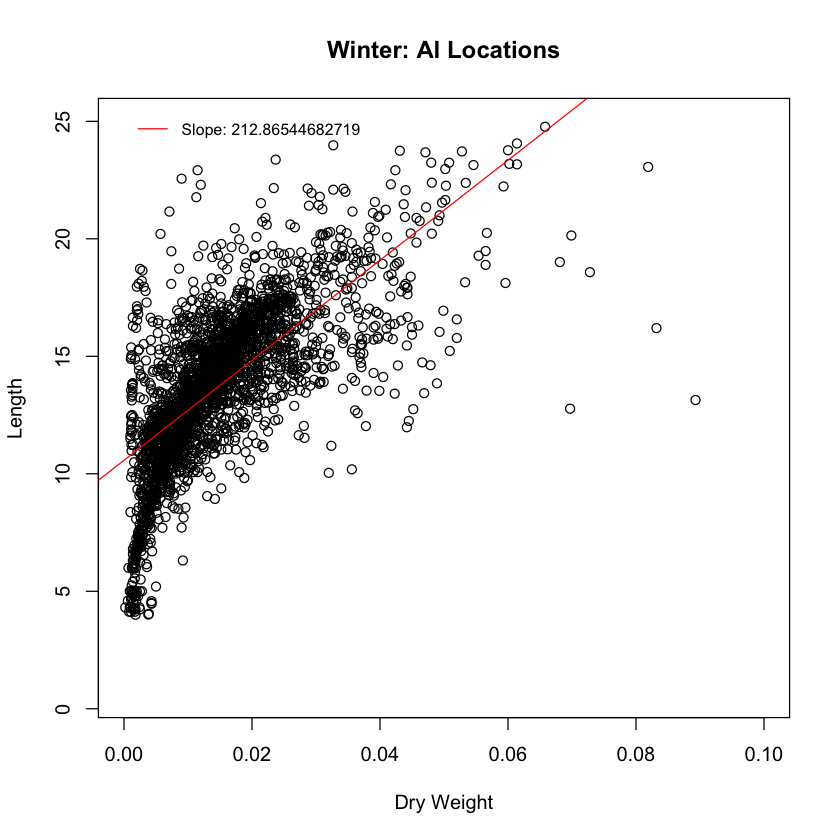

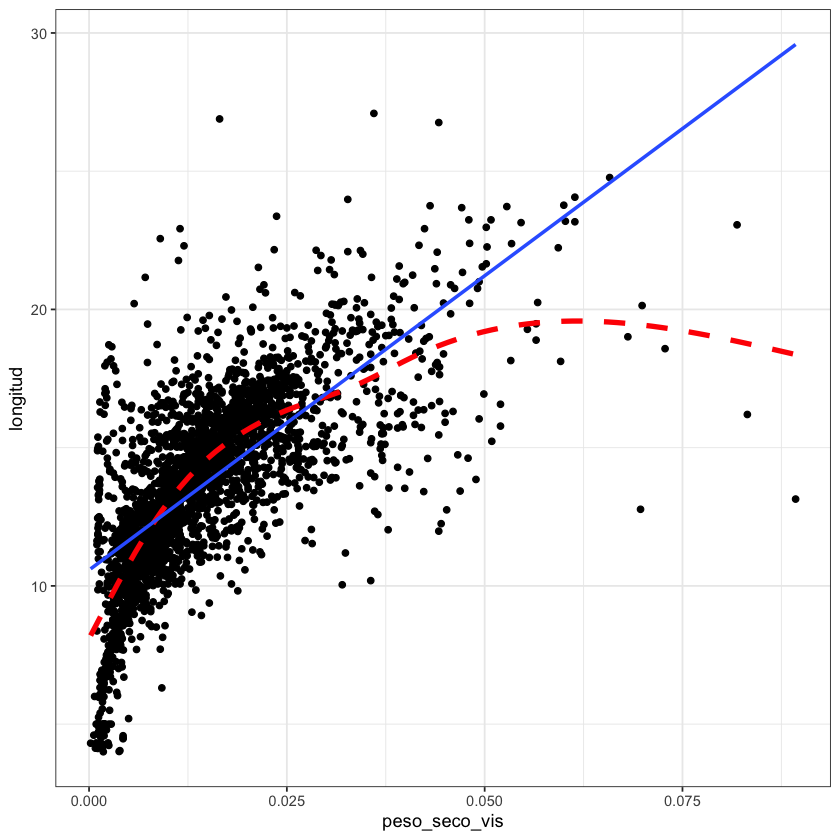

In [26]:
MDQ_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0 )
#calculo del coeficiente de correlacion 
cor(MDQ_invierno$peso_seco_vis,MDQ_invierno$longitud)
#Guarda el archivo
#pdf("MDQ_invierno_Todos.pdf") 
plot( MDQ_invierno$peso_seco_vis, MDQ_invierno$longitud,ylim = c(0.6, 25),xlim = c(0, 0.1), xlab="Dry Weight", ylab="Length",main="Winter: Al Locations") # gráfico de dispersión
MLatin <- lm(MDQ_invierno$longitud ~ MDQ_invierno$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off()  

ggplot(MDQ_invierno, aes(peso_seco_vis, longitud) ) +
        geom_point() +
        stat_smooth(se = FALSE,linetype="dashed",size=1.5,colour="red")+ 
        stat_smooth(method = "lm",se=FALSE)+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
        theme_bw() 
#dev.off()  

<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, CON LONGITUD MAYOR A 8 </h3>

[1] 0.675784

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



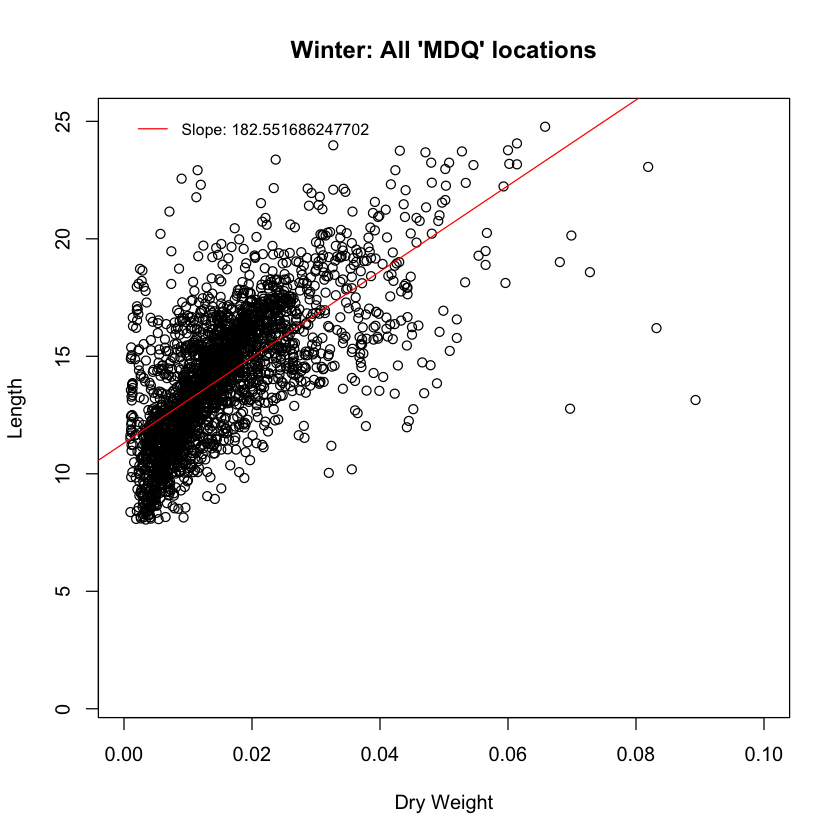

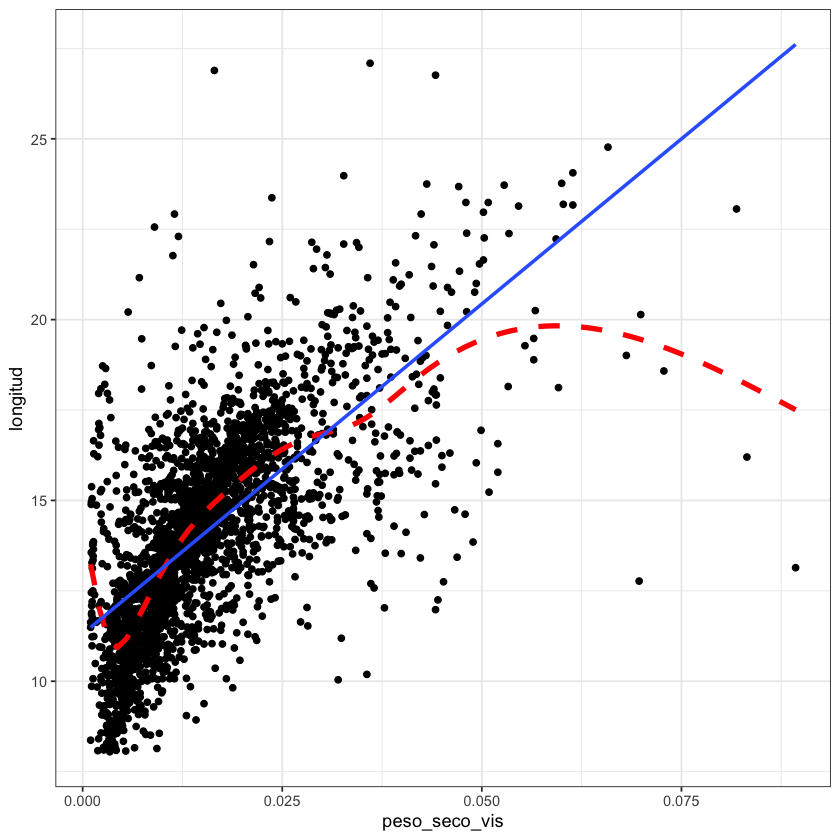

In [25]:
MDQ_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0 & longitud > 8)
#calculo del coeficiente de correlacion 
cor(MDQ_invierno$peso_seco_vis,MDQ_invierno$longitud)
#Guarda el archivo
#pdf("MDQ_invierno_Todos.pdf") 
plot( MDQ_invierno$peso_seco_vis, MDQ_invierno$longitud,ylim = c(0.6, 25),xlim = c(0, 0.1), xlab="Dry Weight", ylab="Length",main="Winter: All 'MDQ' locations") # gráfico de dispersión
MLatin <- lm(MDQ_invierno$longitud ~ MDQ_invierno$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off()  
ggplot(MDQ_invierno, aes(peso_seco_vis, longitud) ) +
        geom_point() +
        stat_smooth(se = FALSE,linetype="dashed",size=1.5,colour="red")+ 
        stat_smooth(method = "lm",se=FALSE)+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
        theme_bw() 


<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno: Todos los lugares </h3>

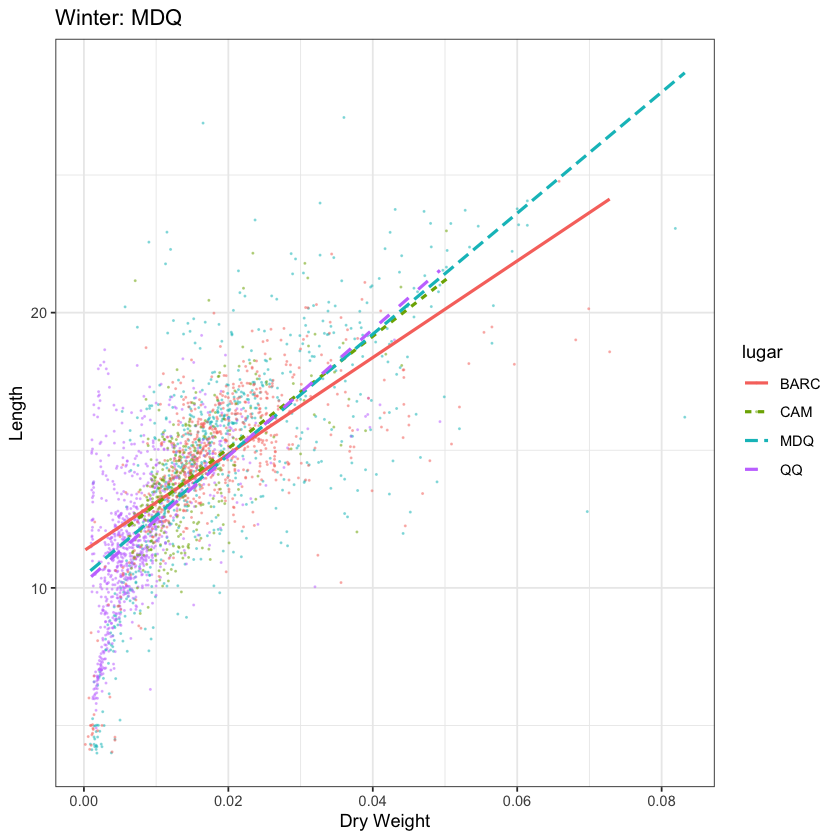

In [86]:
MDQ_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0  )
#Guarda el archivo
#pdf("MDQ_invierno_Todos_variasPendientes.pdf") 
ggplot(MDQ_invierno,
       aes(x=MDQ_invierno$peso_seco_vis,
           y=MDQ_invierno$longitud,
           color=lugar))+
        geom_point(alpha = 0.4, size = 0.2, position = position_jitter()) + 
        stat_smooth(method = "lm", se=FALSE , size=0.9, aes(linetype=lugar))+
        labs(x = "Dry Weight", y = "Length", title = "Winter: MDQ")+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
        theme_bw() 
#dev.off()  

<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno: Todos los lugares Y LONGITUD MAYOR A 8 </h3>

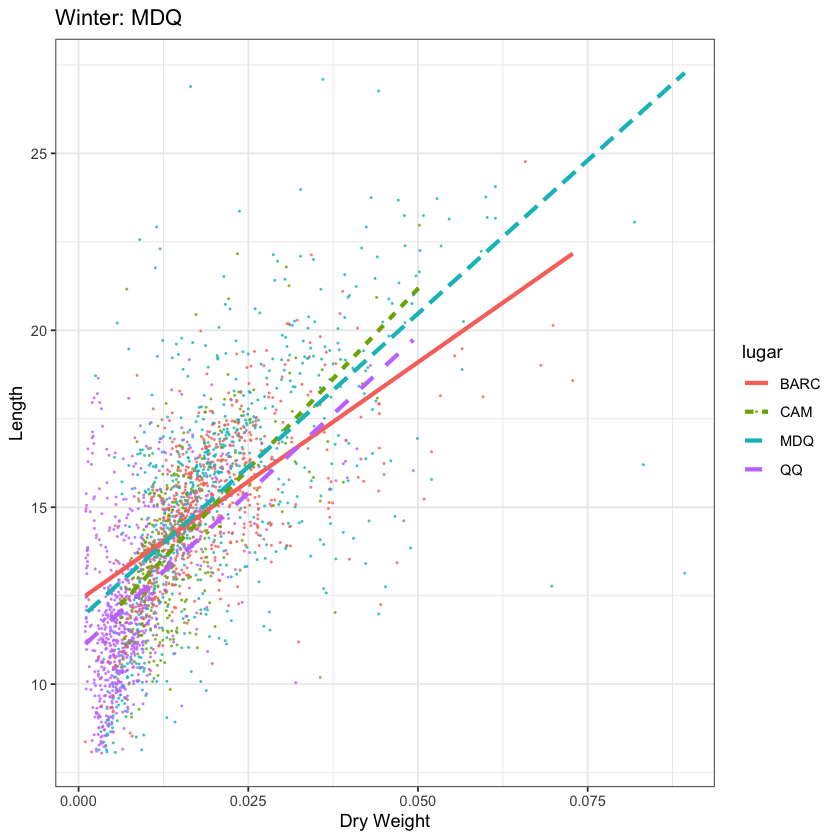

In [24]:
MDQ_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0  & longitud > 8 )
#Guarda el archivo
#pdf("MDQ_invierno_Todos_variasPendientes.pdf") 
ggplot(MDQ_invierno,
       aes(x=MDQ_invierno$peso_seco_vis,
           y=MDQ_invierno$longitud,
           color=lugar))+
        geom_point(alpha = 0.7, size = 0.2, position = position_jitter()) + 
        stat_smooth(method = "lm", se=FALSE , size=1.2, aes(linetype=lugar))+
        labs(x = "Dry Weight", y = "Length", title = "Winter: MDQ")+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
        theme_bw() 
#dev.off() 

<h3>Relación entre la Longitud y el Peso en Seco en la estación de primavera: Todos los lugares </h3>

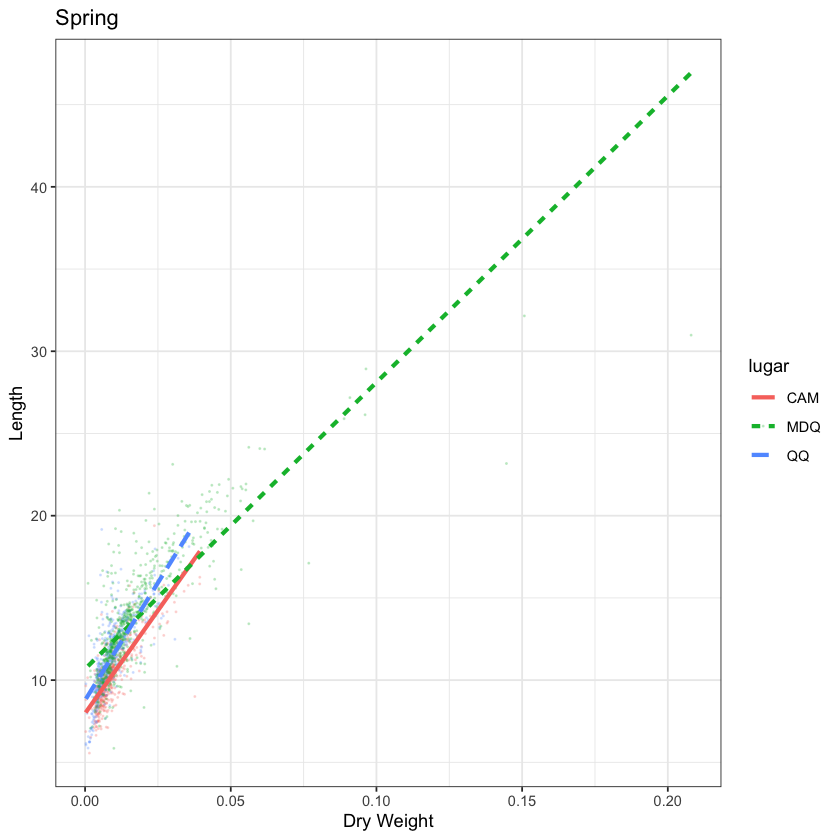

In [23]:
MDQ_primavera <- filter(data, Estacion=="primavera" & peso_seco_vis > 0  )
#Guarda el archivo
#pdf("MDQ_invierno_Todos_variasPendientes.pdf") 
ggplot(MDQ_primavera,
       aes(x=MDQ_primavera$peso_seco_vis,
           y=MDQ_primavera$longitud,
           color=lugar))+
        geom_point(alpha = 0.2, size = 0.2, position = position_jitter()) + 
        stat_smooth(method = "lm", se=FALSE , size=1.2, aes(linetype=lugar))+
        labs(x = "Dry Weight", y = "Length", title = "Spring")+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
        theme_bw() 

<h3>Relación entre la Longitud y el Peso en Seco en la estación de primavera: Todos los lugares Y LONGITUD MAYOR A 8</h3>

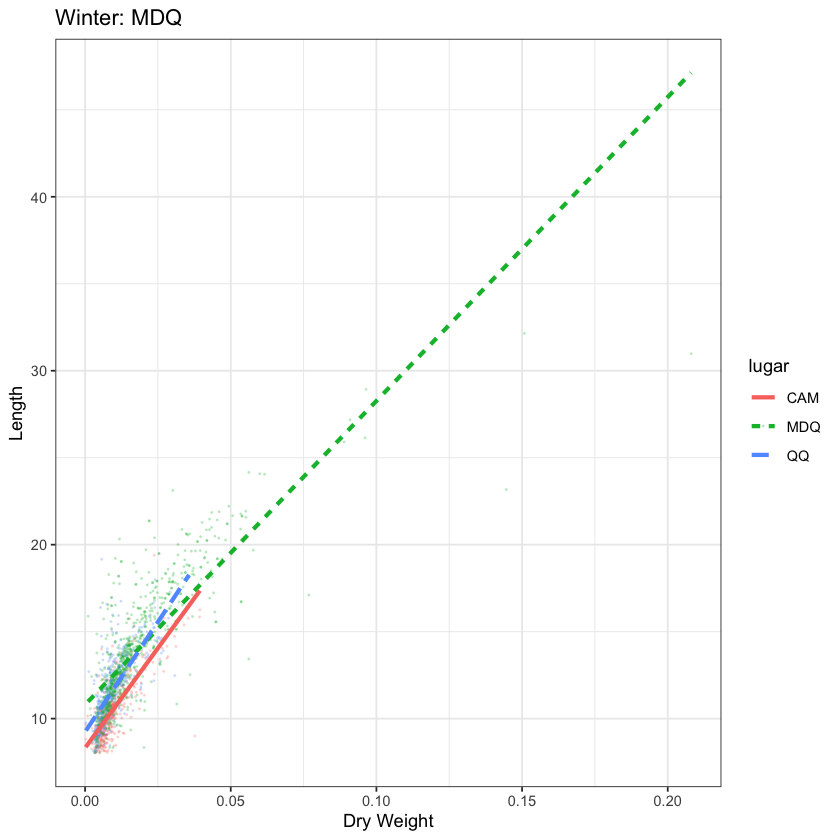

In [98]:
MDQ_primavera <- filter(data, Estacion=="primavera" & peso_seco_vis > 0 & longitud > 8 )
#Guarda el archivo
#pdf("MDQ_invierno_Todos_variasPendientes.pdf") 
ggplot(MDQ_primavera,
       aes(x=MDQ_primavera$peso_seco_vis,
           y=MDQ_primavera$longitud,
           color=lugar))+
        geom_point(alpha = 0.2, size = 0.2, position = position_jitter()) + 
        stat_smooth(method = "lm", se=FALSE , size=1.2, aes(linetype=lugar))+
        labs(x = "Dry Weight", y = "Length", title = "Winter: MDQ")+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) +
        theme_bw() 

<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, Puerto Quequén ('QQ')</h3>

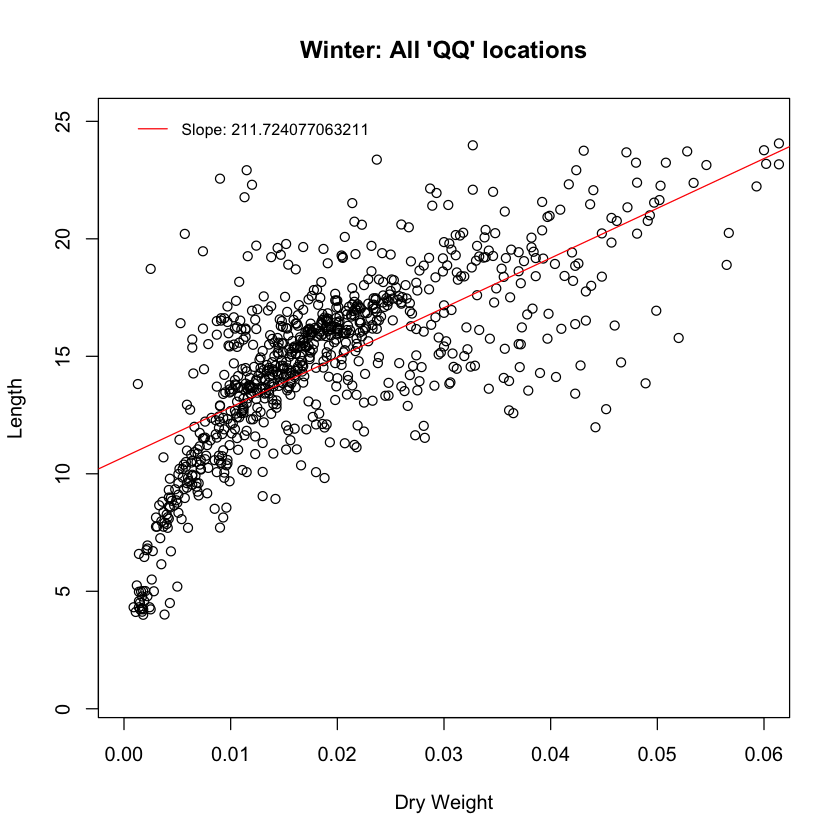

In [20]:
QQ_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0 & grepl('MDQ', data$lugar) )
#Guarda el archivo
#pdf("QQ_invierno_Todos.pdf") 
plot( QQ_invierno$peso_seco_vis, QQ_invierno$longitud,ylim = c(0.6, 25),xlim = c(0, 0.06), xlab="Dry Weight", ylab="Length",main="Winter: All 'QQ' locations") # gráfico de dispersión
MLatin <- lm(QQ_invierno$longitud ~ QQ_invierno$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off() 

<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, Puerto Quequén ('QQ')</h3>

Warning message:
“Removed 18 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 18 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 18 rows containing missing values (geom_point).”


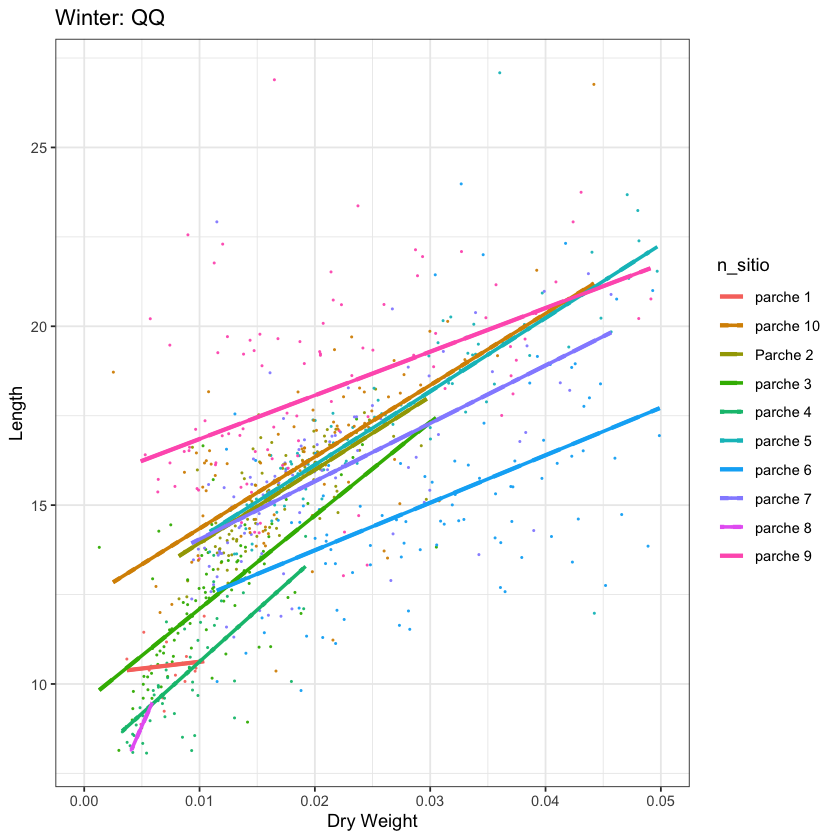

In [21]:
QQ_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0 & grepl('MDQ', data$lugar) & longitud > 8)
#Guarda el archivo
#pdf("QQ_invierno_Todos_variasPendientes.pdf") 
ggplot(QQ_invierno,
       aes(x=QQ_invierno$peso_seco_vis,
           y=QQ_invierno$longitud,
           color=n_sitio))+
        geom_point(alpha = 0.9, size = 0.2, position = position_jitter()) + 
        stat_smooth(method = "lm", se=FALSE , size=1.2, aes(linetype=n_sitio))+
        labs(x = "Dry Weight", y = "Length", title = "Winter: QQ")+
        xlim(0, 0.050)+ 
        stat_smooth(method = "lm",se=FALSE)+
        labs(x = "Dry Weight", y = "Length", title = "Winter: QQ")+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) +
        theme_bw() 

#dev.off() 


<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, Camet ('CAM')</h3>

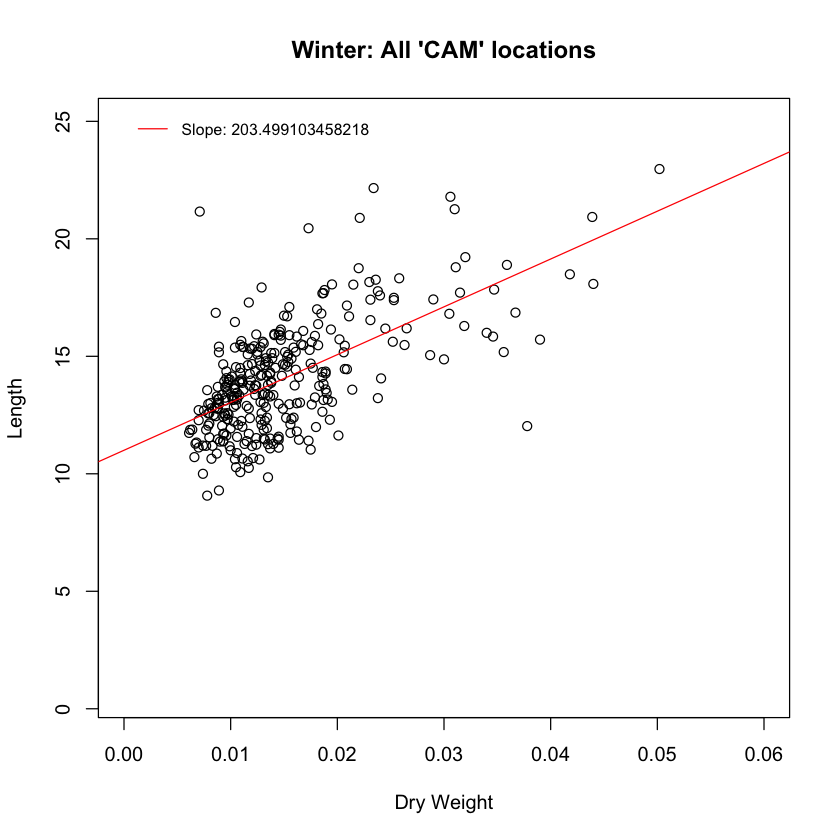

In [87]:
CAM_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0 & grepl('CAM', data$lugar) )
#Guarda el archivo
#pdf("CAM_invierno_Todos.pdf") 
plot( CAM_invierno$peso_seco_vis, CAM_invierno$longitud,ylim = c(0.6, 25),xlim = c(0, 0.06), xlab="Dry Weight", ylab="Length",main="Winter: All 'CAM' locations") # gráfico de dispersión
MLatin <- lm(CAM_invierno$longitud ~ CAM_invierno$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off() 

<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, Camet ('CAM')</h3>

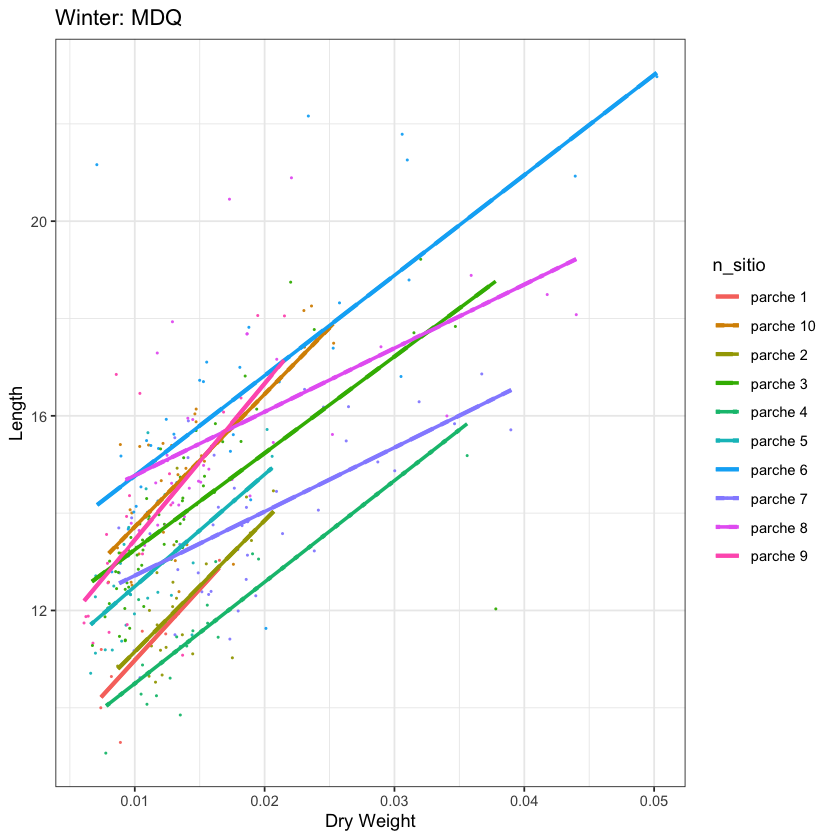

In [100]:
CAM_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0 & grepl('CAM', data$lugar) )
#Guarda el archivo
#pdf("CAM_invierno_Todos_variasPendientes.pdf") 
ggplot(CAM_invierno,
       aes(x=CAM_invierno$peso_seco_vis,
           y=CAM_invierno$longitud,
           color=n_sitio))+
        geom_point(alpha = 0.9, size = 0.2, position = position_jitter()) + 
        stat_smooth(method = "lm", se=FALSE , size=1.2, aes(linetype=n_sitio))+
        labs(x = "Dry Weight", y = "Length", title = "Winter: CAM")+ 
        stat_smooth(method = "lm",se=FALSE)+
        labs(x = "Dry Weight", y = "Length", title = "Winter: MDQ")+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) +
        theme_bw() 
#dev.off() 

<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, BARC ('BAR')</h3>

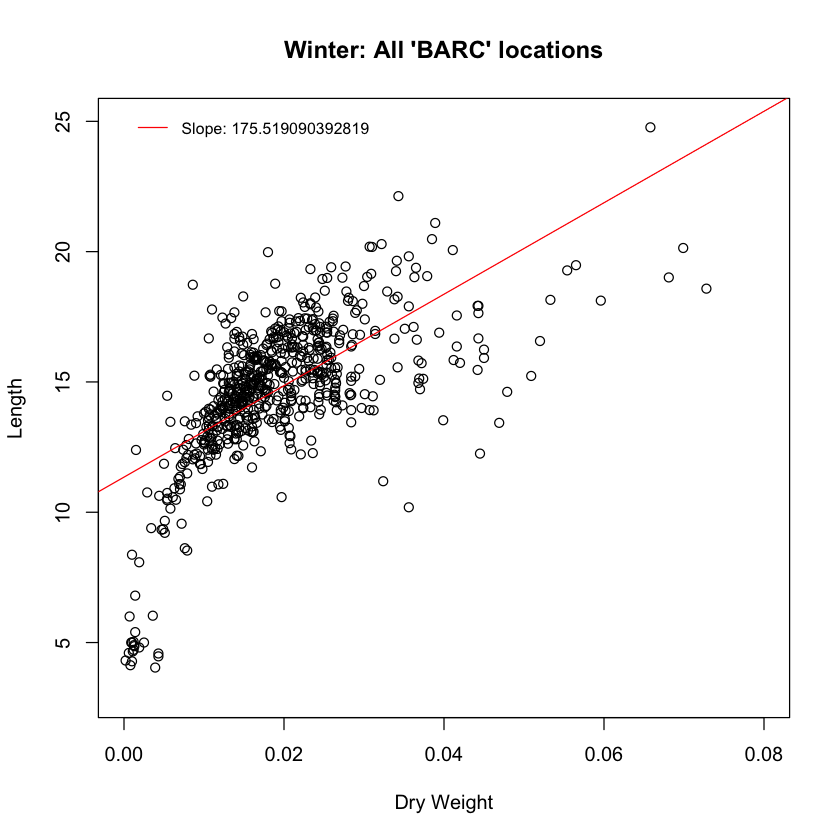

In [156]:
BARC_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0 & grepl('BARC', data$lugar) )
#Guarda el archivo
#pdf("BARC_invierno_Todos.pdf") 
plot( BARC_invierno$peso_seco_vis, BARC_invierno$longitud,ylim = c(3, 25),xlim = c(0, 0.08), xlab="Dry Weight", ylab="Length",main="Winter: All 'BARC' locations") # gráfico de dispersión
MLatin <- lm(BARC_invierno$longitud ~ BARC_invierno$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off()

<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, BARC ('BAR')</h3>

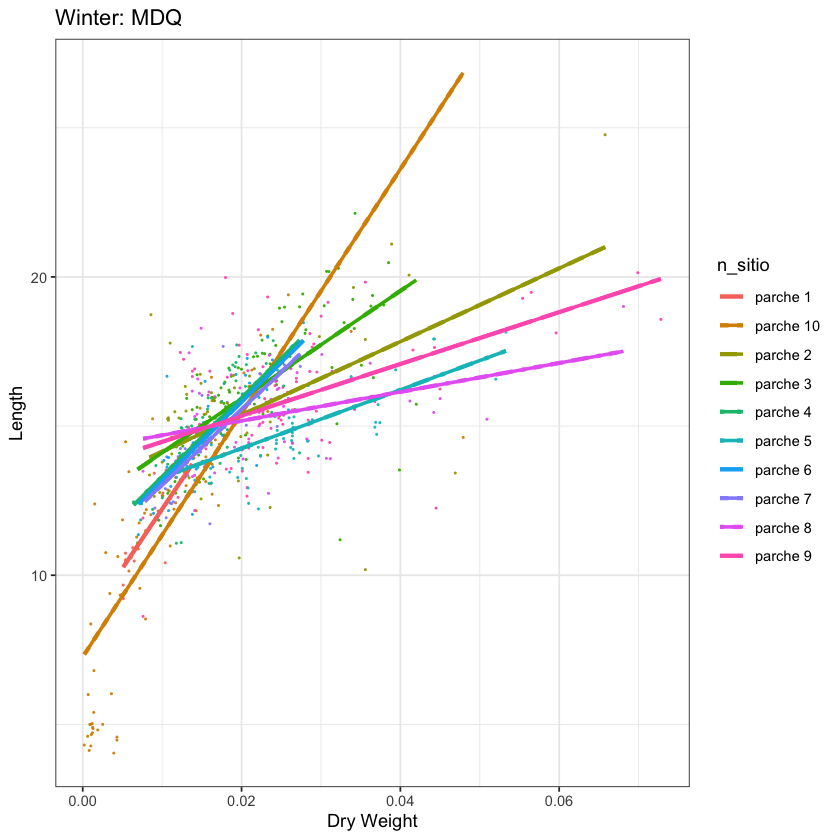

In [101]:
BARC_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0 & grepl('BARC', data$lugar) )
#Guarda el archivo
#pdf("BARC_invierno_Todos_variasPendientes.pdf") 
ggplot(BARC_invierno,
       aes(x=BARC_invierno$peso_seco_vis,
           y=BARC_invierno$longitud,
           color=n_sitio))+
         geom_point(alpha = 0.9, size = 0.2, position = position_jitter()) + 
        stat_smooth(method = "lm", se=FALSE , size=1.2, aes(linetype=n_sitio))+
        labs(x = "Dry Weight", y = "Length", title = "Winter: BARC")+ 
        stat_smooth(method = "lm",se=FALSE)+
        labs(x = "Dry Weight", y = "Length", title = "Winter: MDQ")+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) +
        theme_bw() 
#dev.off() 

<h2>Relación entre la Longitud y el Peso en Seco utilizando el total de las muestras, Estación: Primavera</h2>
El eje vertical  y horizontal, representan la longitud y peso en seco respectivamente.
<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, Puerto Mar de Plata ('MDQ') </h3>

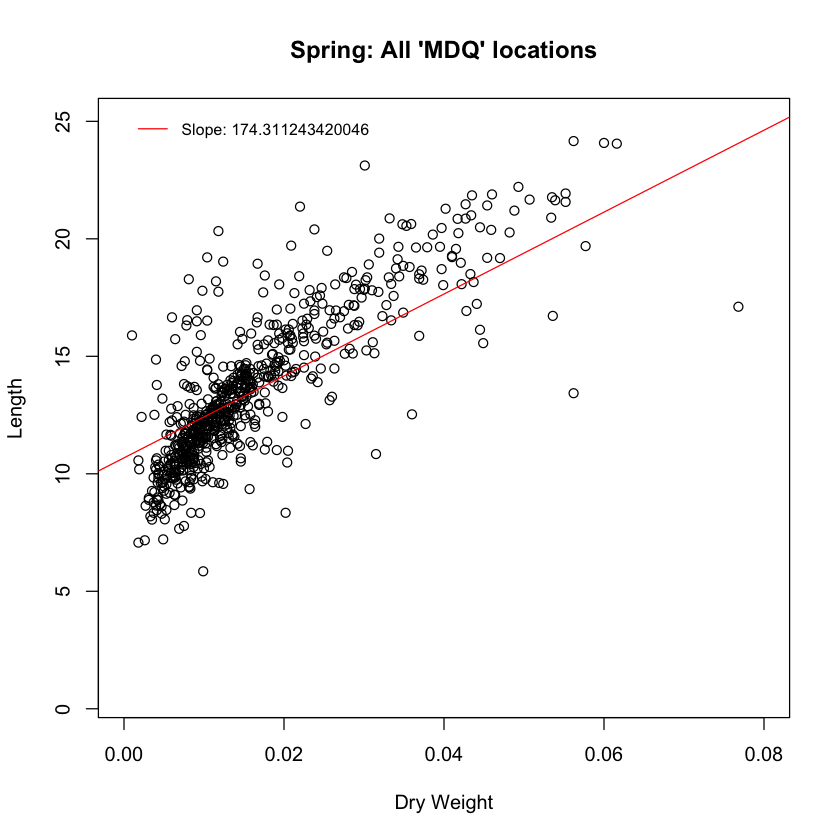

In [22]:
MDQ_primavera <- filter(data, Estacion=="primavera" & peso_seco_vis > 0 & grepl('MDQ', data$lugar) )
#Guarda el archivo
#pdf("MDQ_primavera_Todos.pdf") 
plot( MDQ_primavera$peso_seco_vis, MDQ_primavera$longitud,ylim = c(0.6, 25),xlim = c(0, 0.08), xlab="Dry Weight", ylab="Length",main="Spring: All 'MDQ' locations") # gráfico de dispersión
MLatin <- lm(MDQ_primavera$longitud ~ MDQ_primavera$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off()  



<h3>Relación entre la Longitud y el Peso en Seco en la estación de primavera, Puerto Mar de Plata ('MDQ') </h3>

Warning message:
“Removed 7 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 7 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


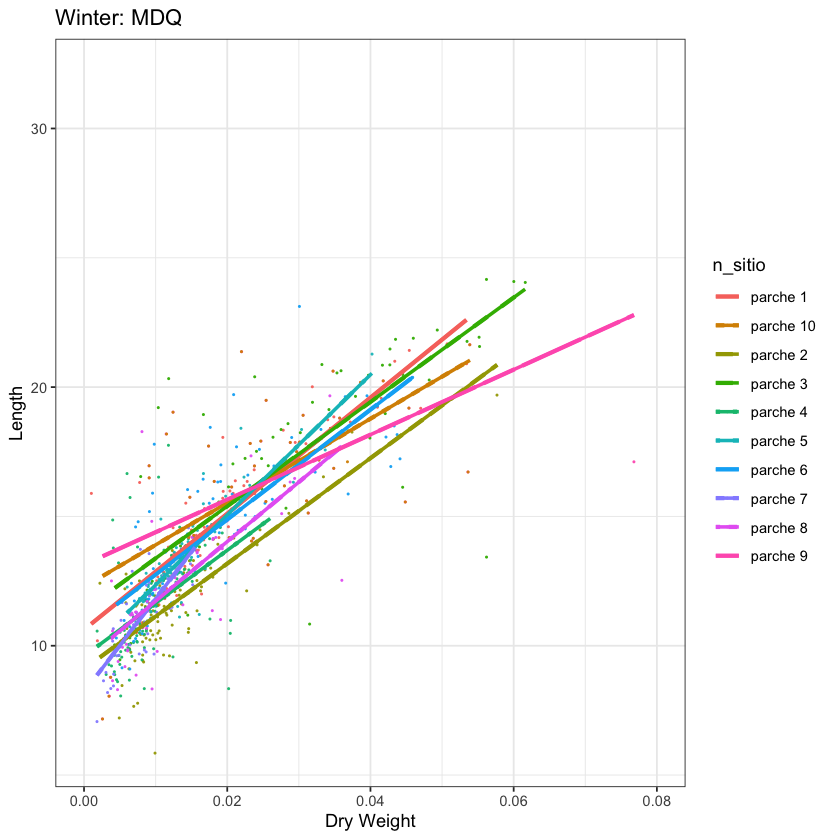

In [102]:
MDQ_primavera <- filter(data, Estacion=="primavera" & peso_seco_vis > 0 & grepl('MDQ', data$lugar) )
#Guarda el archivo
#pdf("MDQ_invierno_Todos_variasPendientes.pdf") 
ggplot(MDQ_primavera,
       aes(x=MDQ_primavera$peso_seco_vis,
           y=MDQ_primavera$longitud,
           color=n_sitio))+
         geom_point(alpha = 0.9, size = 0.2, position = position_jitter()) + 
        stat_smooth(method = "lm", se=FALSE , size=1.2, aes(linetype=n_sitio))+
        labs(x = "Dry Weight", y = "Length", title = "Spring: MDQ")+
        xlim(0, 0.08)+ 
        stat_smooth(method = "lm",se=FALSE)+
        labs(x = "Dry Weight", y = "Length", title = "Winter: MDQ")+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) +
        theme_bw() 
#dev.off()  

<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, Puerto Quequén ('QQ')</h3>

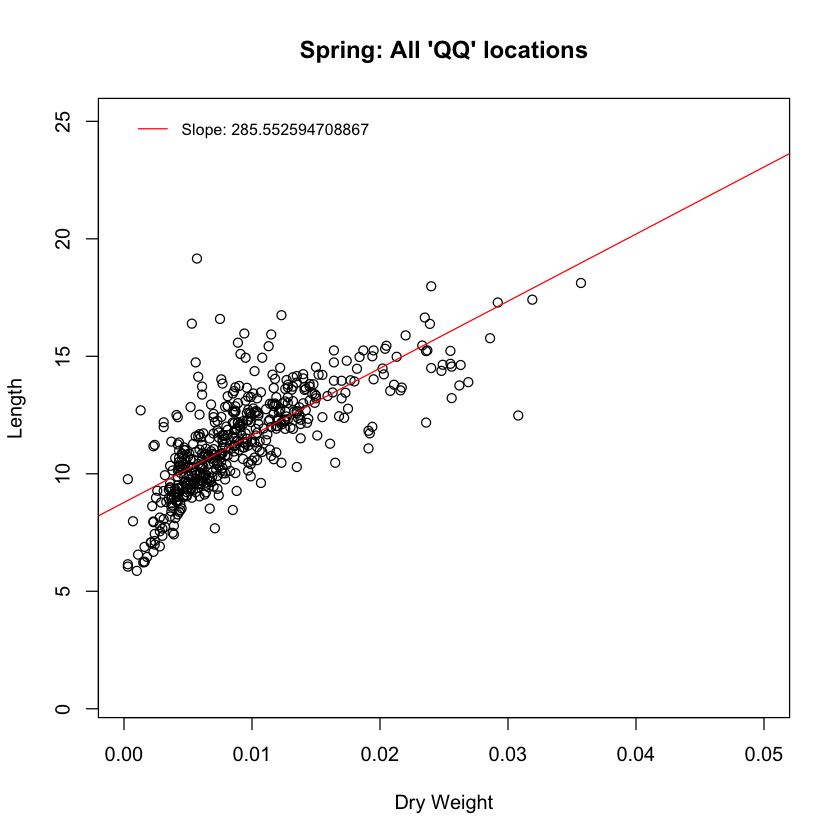

In [158]:

QQ_primavera <- filter(data, Estacion=="primavera" & peso_seco_vis > 0 & grepl('QQ', data$lugar) )
#Guarda el archivo
#pdf("QQ_primavera_Todos.pdf") 
plot( QQ_primavera$peso_seco_vis, QQ_primavera$longitud,ylim = c(0.6, 25),xlim = c(0, 0.05), xlab="Dry Weight", ylab="Length",main="Spring: All 'QQ' locations") # gráfico de dispersión
MLatin <- lm(QQ_primavera$longitud ~ QQ_primavera$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off() 


<h3>Relación entre la Longitud y el Peso en Seco en la estación de primavera, Puerto Quequén ('QQ')</h3>

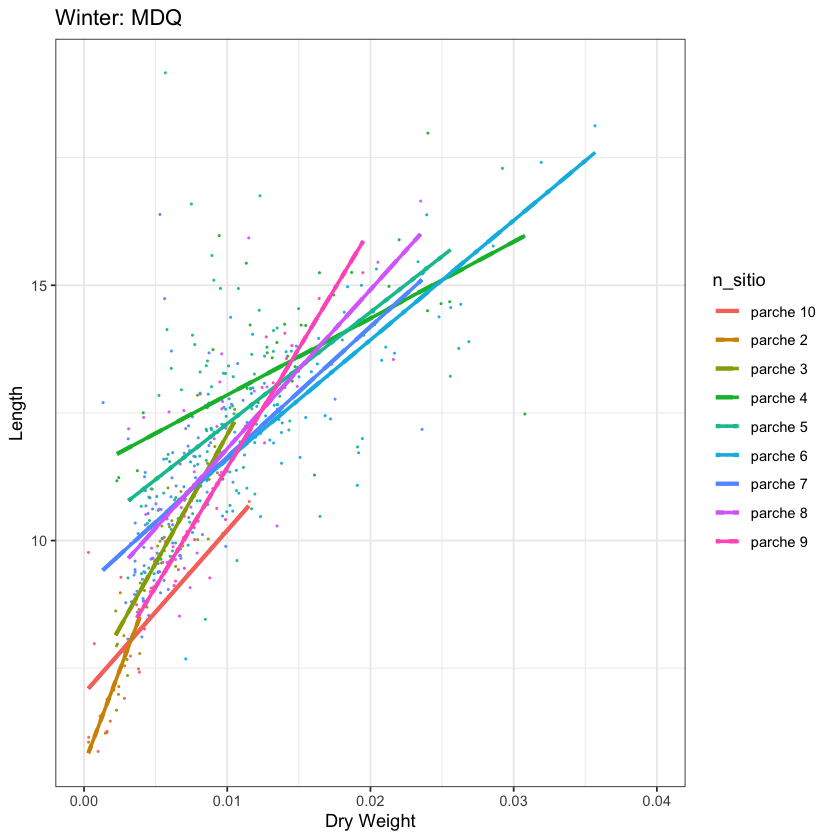

In [103]:
QQ_primavera <- filter(data, Estacion=="primavera" & peso_seco_vis > 0 & grepl('QQ', data$lugar) )
#Guarda el archivo
#pdf("QQ_primavera_Todos_variasPendientes.pdf") 
ggplot(QQ_primavera,
       aes(x=QQ_primavera$peso_seco_vis,
           y=QQ_primavera$longitud,
           color=n_sitio))+
        geom_point(alpha = 0.9, size = 0.2, position = position_jitter()) + 
        stat_smooth(method = "lm", se=FALSE , size=1.2, aes(linetype=n_sitio))+
        labs(x = "Dry Weight", y = "Length", title = "Spring: QQ")+
        xlim(0, 0.04)+ 
        stat_smooth(method = "lm",se=FALSE)+
        labs(x = "Dry Weight", y = "Length", title = "Winter: MDQ")+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) +
        theme_bw() 
#dev.off() 

<h3>Relación entre la Longitud y el Peso en Seco en la estación de primavera, Camet ('CAM')</h3>

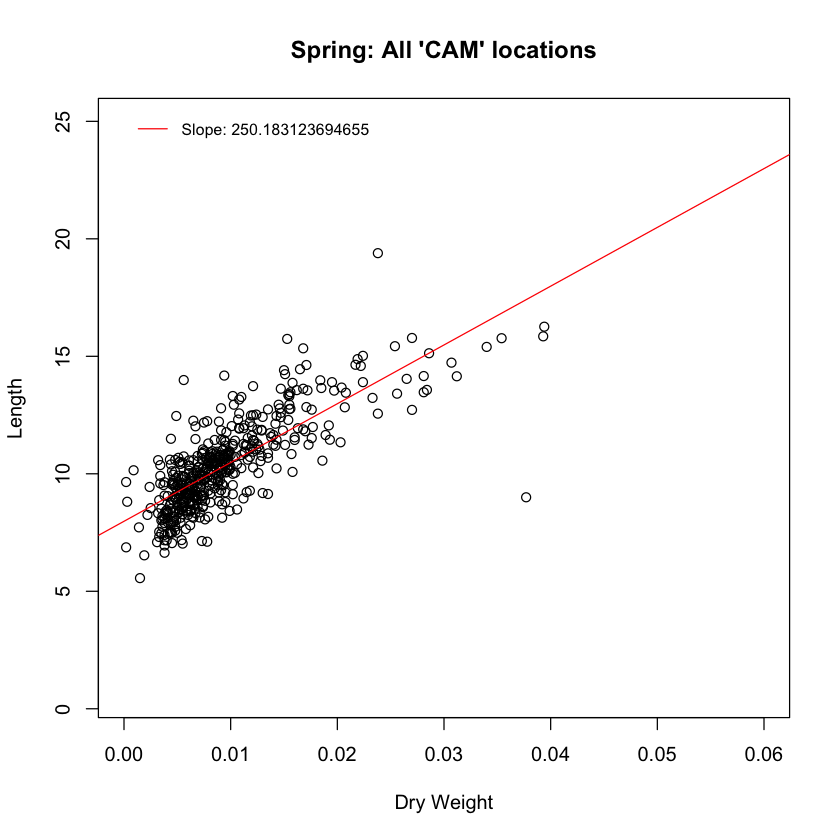

In [160]:
CAM_primavera <- filter(data, Estacion=="primavera" & peso_seco_vis > 0 & grepl('CAM', data$lugar) )
#Guarda el archivo
#pdf("CAM_primavera_Todos.pdf") 
plot( CAM_primavera$peso_seco_vis, CAM_primavera$longitud,ylim = c(0.6, 25),xlim = c(0, 0.06), xlab="Dry Weight", ylab="Length",main="Spring: All 'CAM' locations") # gráfico de dispersión
MLatin <- lm(CAM_primavera$longitud ~ CAM_primavera$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off()

<h3>Relación entre la Longitud y el Peso en Seco en la estación de primavera, Camet ('CAM')</h3>

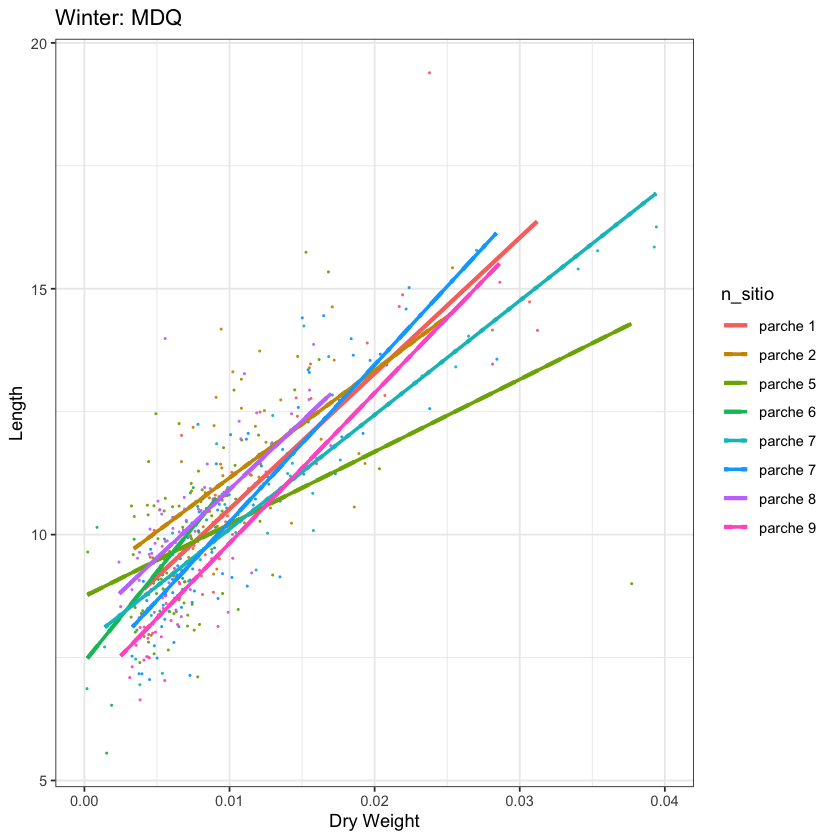

In [104]:
CAM_primavera <- filter(data, Estacion=="primavera" & peso_seco_vis > 0 & grepl('CAM', data$lugar) )
#Guarda el archivo
#pdf("CAM_primavera_Todos_variasPendientes.pdf") 
ggplot(CAM_primavera,
       aes(x=CAM_primavera$peso_seco_vis,
           y=CAM_primavera$longitud,
           color=n_sitio))+
         geom_point(alpha = 0.9, size = 0.2, position = position_jitter()) + 
        stat_smooth(method = "lm", se=FALSE , size=1.2, aes(linetype=n_sitio))+
        labs(x = "Dry Weight", y = "Length", title = "Winter: CAM")+
        xlim(0, 0.04)+ 
        stat_smooth(method = "lm",se=FALSE)+
        labs(x = "Dry Weight", y = "Length", title = "Winter: MDQ")+
        theme_bw() +
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank()) +
        theme_bw() 
#dev.off() 

<h2>Relación entre la Longitud y el Peso en Seco para cada lugar individual, Estación:  Invierno</h2>
El eje vertical  y horizontal, representan la longitud y peso en seco respectivamente.
<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, Puerto Mar de Plata ('MDQ2') </h3>

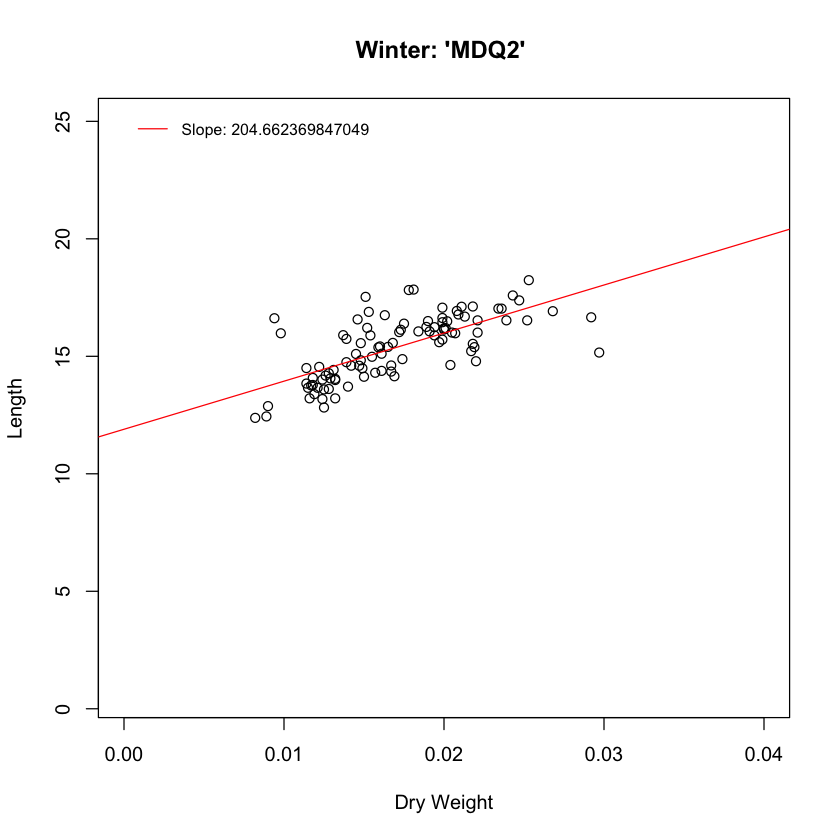

In [48]:
MDQ2_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0 & grepl('MDQ 2', data$lugar) )
#Guarda el archivo
#pdf("MDQ2_invierno_Todos.pdf") 
plot( MDQ2_invierno$peso_seco_vis, MDQ2_invierno$longitud,ylim = c(0.6, 25),xlim = c(0, 0.04), xlab="Dry Weight", ylab="Length",main="Winter: 'MDQ2' ") # gráfico de dispersión
MLatin <- lm(MDQ2_invierno$longitud ~ MDQ2_invierno$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off()  

<h3>Relación entre la Longitud y el Peso en Seco en la estación de invierno, Puerto Mar de Plata ('MDQ3') </h3>

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


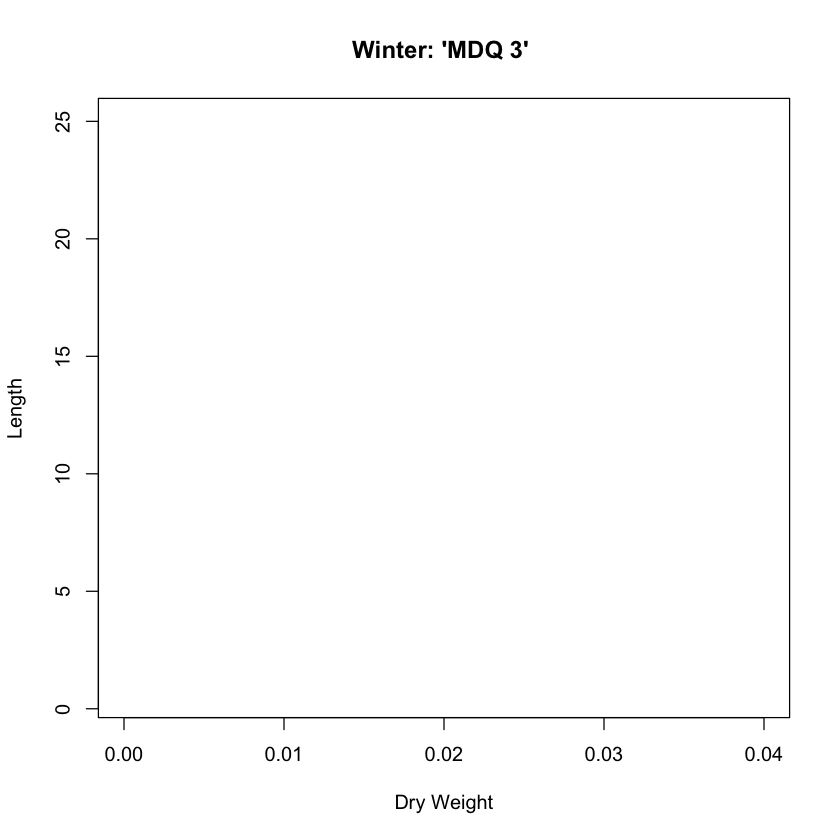

In [162]:
MDQ3_invierno <- filter(data, Estacion=="invierno" & peso_seco_vis > 0 & grepl('MDQ 3', data$lugar) )
#Guarda el archivo
#pdf("MDQ9_invierno_Todos.pdf") 
plot( MDQ3_invierno$peso_seco_vis, MDQ3_invierno$longitud,ylim = c(0.6, 25),xlim = c(0, 0.04), xlab="Dry Weight", ylab="Length",main="Winter: 'MDQ 3' ") # gráfico de dispersión
MLatin <- lm(MDQ3_invierno$longitud ~ MDQ3_invierno$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off()  

<h2>Relación entre la Longitud y el Peso en Seco para cada lugar individual, Estación:  Primavera</h2>
El eje vertical  y horizontal, representan la longitud y peso en seco respectivamente.
<h3>Relación entre la Longitud y el Peso en Seco en la estación de primavera, Puerto Mar de Plata ('MDQ1') </h3>

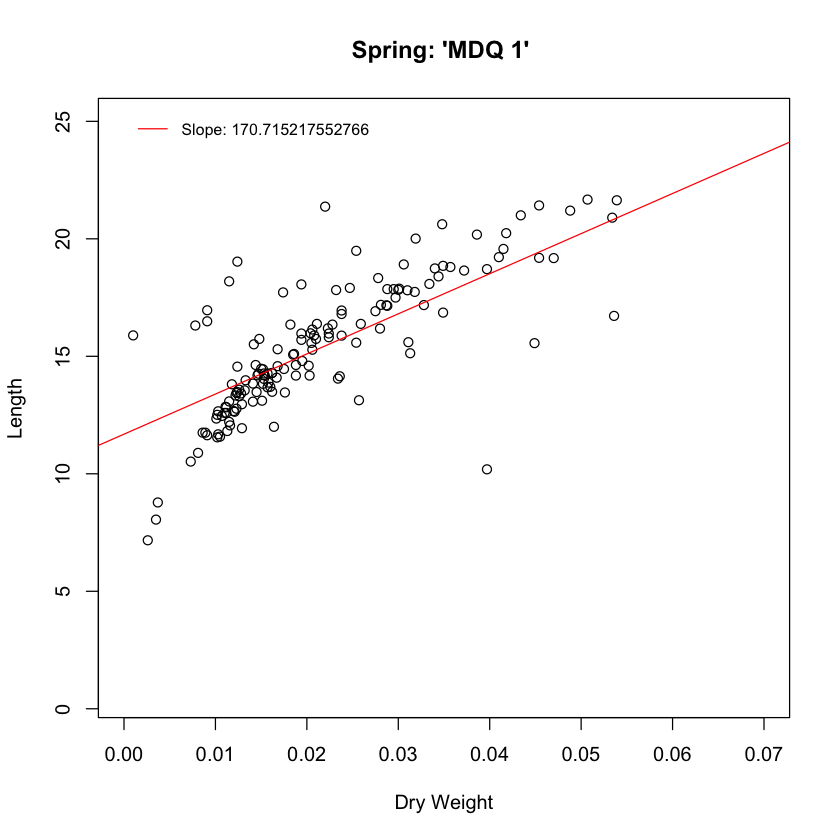

In [54]:
MDQ1_invierno <- filter(data, Estacion=="primavera" & peso_seco_vis > 0 & grepl('MDQ 1', data$lugar) )
#Guarda el archivo
#pdf("MDQ1_primavera_Todos.pdf") 
plot( MDQ1_invierno$peso_seco_vis, MDQ1_invierno$longitud,ylim = c(0.6, 25),xlim = c(0, 0.07), xlab="Dry Weight", ylab="Length",main="Spring: 'MDQ 1' ") # gráfico de dispersión
MLatin <- lm(MDQ1_invierno$longitud ~ MDQ1_invierno$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off() 

<h2>Relación entre la Longitud y el Peso en Seco, Estación:  Primavera/Invierno </h2>
El eje vertical  y horizontal, representan la longitud y peso en seco respectivamente.
<h3>Relación entre la Longitud y el Peso en Seco en las estaciones de primavera-invierno, Puerto Mar de Plata ('MDQ2') </h3>

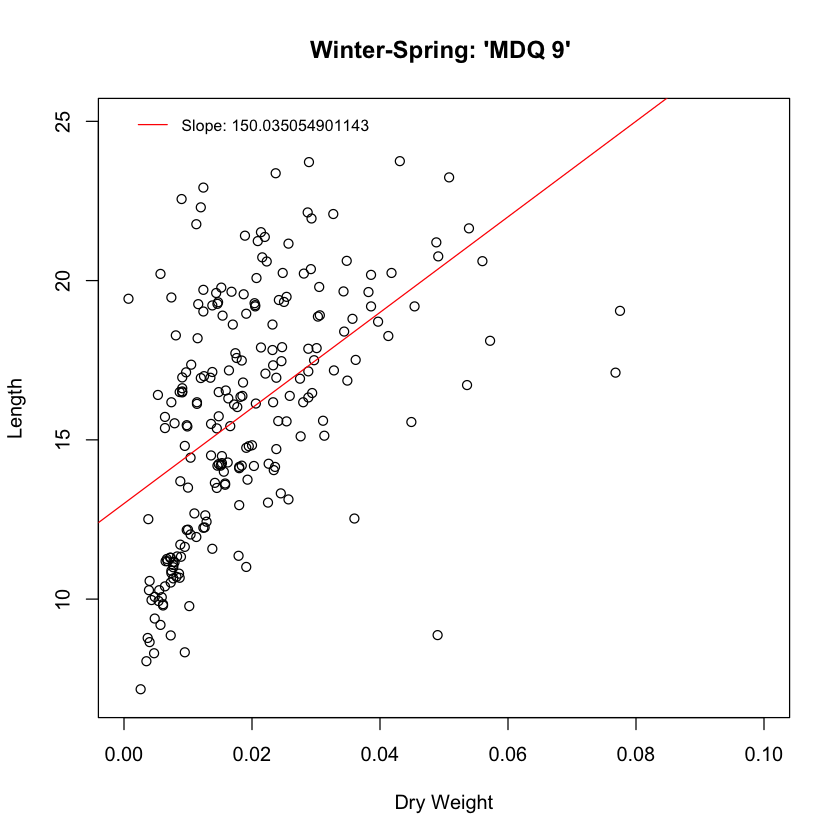

In [54]:
MDQ2_invierno_primavera <- filter(data, peso_seco_vis > 0 & grepl('MDQ 9', data$lugar) )
#Guarda el archivo
#pdf("MDQ9_invierno_primavera.pdf") 
plot( MDQ2_invierno_primavera$peso_seco_vis, MDQ2_invierno_primavera$longitud,ylim = c(7, 25),xlim = c(0, 0.1), xlab="Dry Weight", ylab="Length",main="Winter-Spring: 'MDQ 9' ") # gráfico de dispersión
MLatin <- lm(MDQ2_invierno_primavera$longitud ~ MDQ2_invierno_primavera$peso_seco_vis)
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off() 

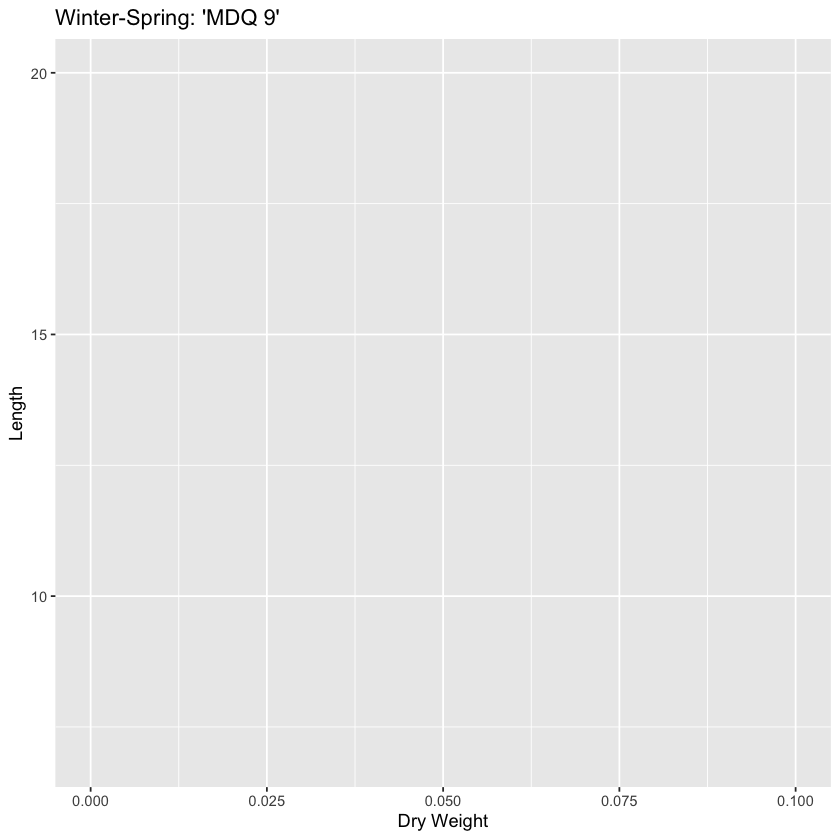

In [118]:
MDQ2_invierno_primavera <- filter(data, peso_seco_vis > 0 & grepl('MDQ 9', data$lugar) )
#Guarda el archivo
#pdf("MDQ9_invierno_primavera_variasPendientes.pdf") 
ggplot(MDQ2_invierno_primavera,
       aes(x=MDQ2_invierno_primavera$peso_seco_vis,
           y=MDQ2_invierno_primavera$longitud,
           color=n_sitio))+
        geom_point(alpha = 0.3,  position = position_jitter()) + 
        stat_smooth(method = "lm",se=FALSE)+
        labs(x = "Dry Weight", y = "Length", title = "Winter-Spring: 'MDQ 9'")+
        xlim(0, 0.1)+
        ylim(7, 20)
#dev.off() 

# Correlation between less than 8 and grather 8

Estacion,lugar,Id,longitud,ancho,alto,peso_hum,peso_sin_val,peso_seco,peso_seco_vis,peso_sec_val,longitu_menor_4mm
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>


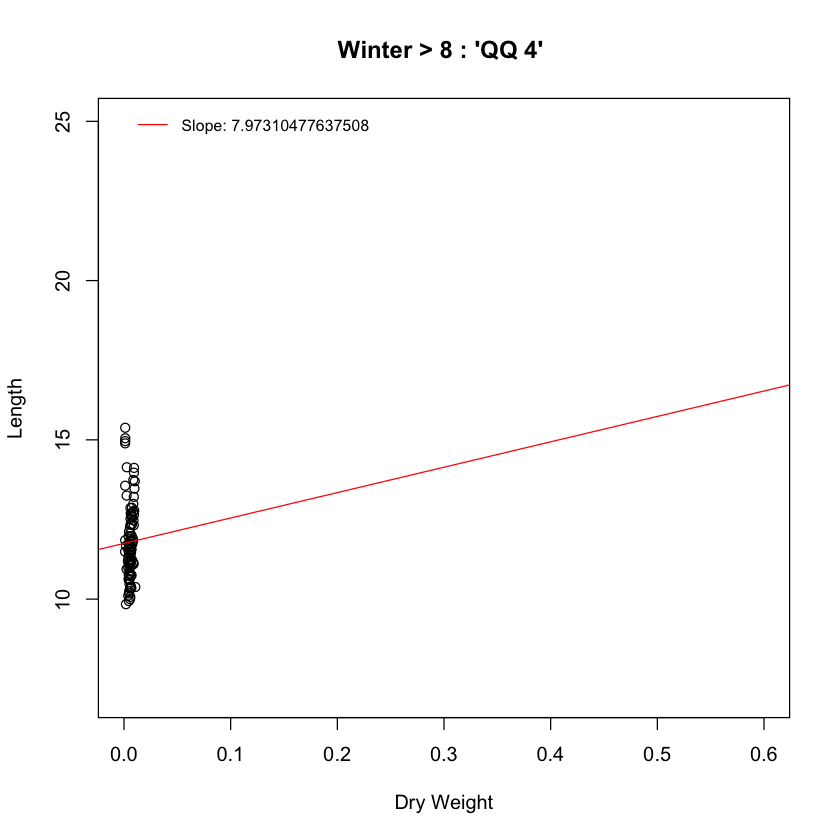

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


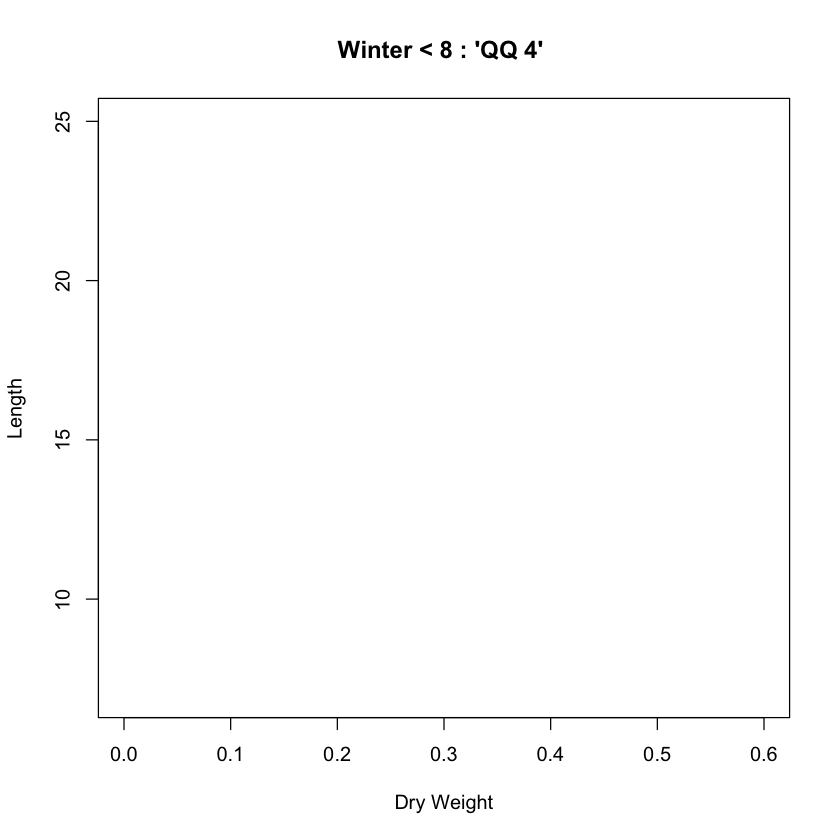

In [60]:
MDQ_mayores8_invierno <- filter(data, Estacion=="invierno"&  peso_seco_vis > 0 & grepl('QQ 4', data$lugar) & longitud  > 8 )
MDQ_menores8_invierno <- filter(data, Estacion=="invierno"& peso_seco_vis > 0 & grepl('QQ 4', data$lugar) & longitud <  8 )
head(MDQ_menores8_invierno)
#Guarda el archivo
#pdf("MDQ9_invierno_primavera_variasPendientes.pdf") 
plot( MDQ_mayores8_invierno$peso_seco_vis, MDQ_mayores8_invierno$longitud,ylim = c(7, 25),xlim = c(0, 0.6), xlab="Dry Weight", ylab="Length",main="Winter > 8 : 'QQ 4' ") # gráfico de dispersión
MLatin <- lm(MDQ_mayores8_invierno$longitud ~ MDQ_mayores8_invierno$peso_seco_vis )
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off() 

plot( MDQ_menores8_invierno$peso_seco_vis, MDQ_menores8_invierno$longitud,ylim = c(7, 25),xlim = c(0, 0.6), xlab="Dry Weight", ylab="Length",main="Winter < 8 : 'QQ 4' ") # gráfico de dispersión
MLatin <- lm(MDQ_menores8_invierno$longitud ~ MDQ_menores8_invierno$peso_seco_vis)
#pendiente
slope  <-  paste('Slope:',MLatin$coefficients[2])
#intercepción con el eje de Longitudes 
intercept  <- paste('Intercept:',MLatin$coefficients[1])
legend(0.0, 25.5, legend=c(slope),
       col=c("red"), lty=1:2, cex=0.8,box.lty=0)
abline(MLatin, col = "red")
#dev.off() 

#ggplot() + stat_smooth(method = "lm",se=FALSE)+
#geom_line(data = MDQ_mayores8_invierno, aes(x = MDQ_mayores8_invierno$peso.seco, y = MDQ_mayores8_invierno$longitud), color = "black") +
#geom_line(data = MDQ_menores8_invierno, aes(x = MDQ_menores8_invierno$peso.seco, y = MDQ_menores8_invierno$longitud), color = "red") +
#geom_point(alpha = 0.3,  position = position_jitter()) 
    


#dev.off() 

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“graphical parameter "type" is obsolete”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“graphical parameter "type" is obsolete”


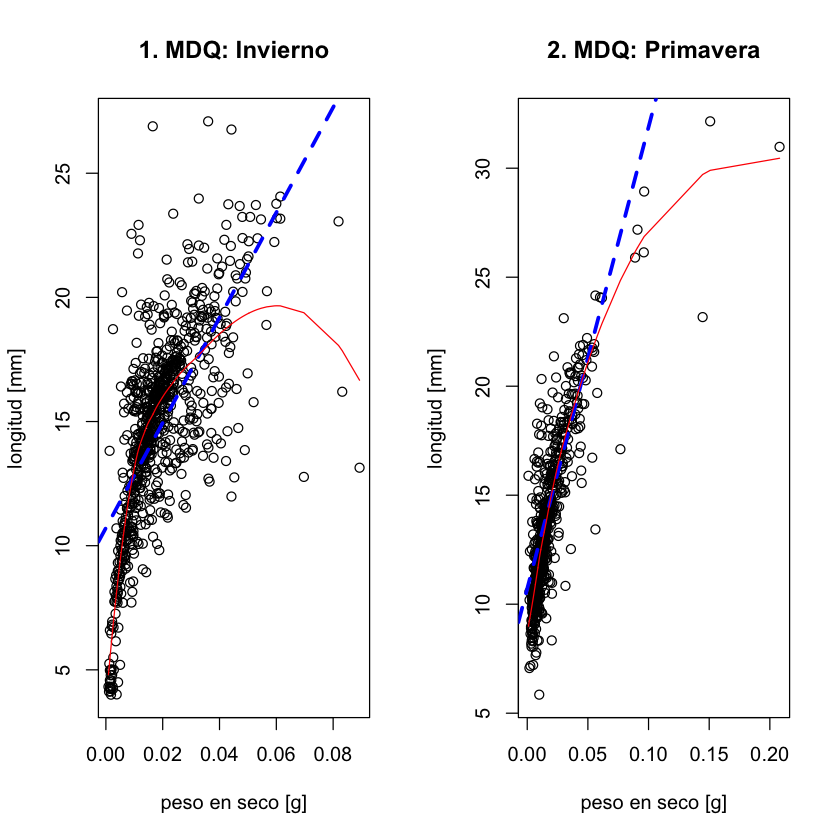

In [89]:
MDQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('MDQ', data$lugar))
QQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('QQ', data$lugar))
CAM_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('CAM', data$lugar))
BARC_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('BARC', data$lugar) )

MDQ_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('MDQ', data$lugar))
QQ_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('QQ', data$lugar))
CAM_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('CAM', data$lugar))
BARC_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('BARC', data$lugar) )
#################### RECLUTAS #######################################################


########################################################################################

layout(matrix(c(1,2,2,2), nrow = 1, ncol = 2, byrow = TRUE))

lw1.Invierno <- loess(longitud ~ peso_seco_vis,data=MDQ_invierno)
MLatin_MDQ.Invierno <- lm(MDQ_invierno$longitud ~ MDQ_invierno$peso_seco_vis )
plot(longitud ~ peso_seco_vis, MDQ_invierno,main="1. MDQ: Invierno",xlab = "peso en seco [g]",ylab = "longitud [mm]")
abline(MLatin_MDQ.Invierno, col = "blue",type="l", lty=2, lwd=3)
j.invierno <- order(MDQ_invierno$peso_seco_vis)
lines(MDQ_invierno$peso_seco_vis[j.invierno], lw1.Invierno$fitted[j.invierno], col = "red")

lw1.Primavera <- loess(longitud ~ peso_seco_vis,data=MDQ_primavera)
MLatin_MDQ.Primavera <- lm(MDQ_primavera$longitud ~ MDQ_primavera$peso_seco_vis )
plot(longitud ~ peso_seco_vis, MDQ_primavera,main="2. MDQ: Primavera",xlab = "peso en seco [g]",ylab = "longitud [mm]")
abline(MLatin_MDQ.Invierno, col = "blue",type="l", lty=2, lwd=3)
j.primavera <- order(MDQ_primavera$peso_seco_vis)
lines(MDQ_primavera$peso_seco_vis[j.primavera], lw1.Primavera$fitted[j.primavera], col = "red")



#plot(1, type = "n", axes=FALSE, xlab="", ylab="")
#legend(x = "top",inset = 0,legend = c("Invierno", "Primavera"), 
#        col=c( "white", "gray"), lwd=5, cex=.5, horiz = TRUE)

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“graphical parameter "type" is obsolete”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“graphical parameter "type" is obsolete”


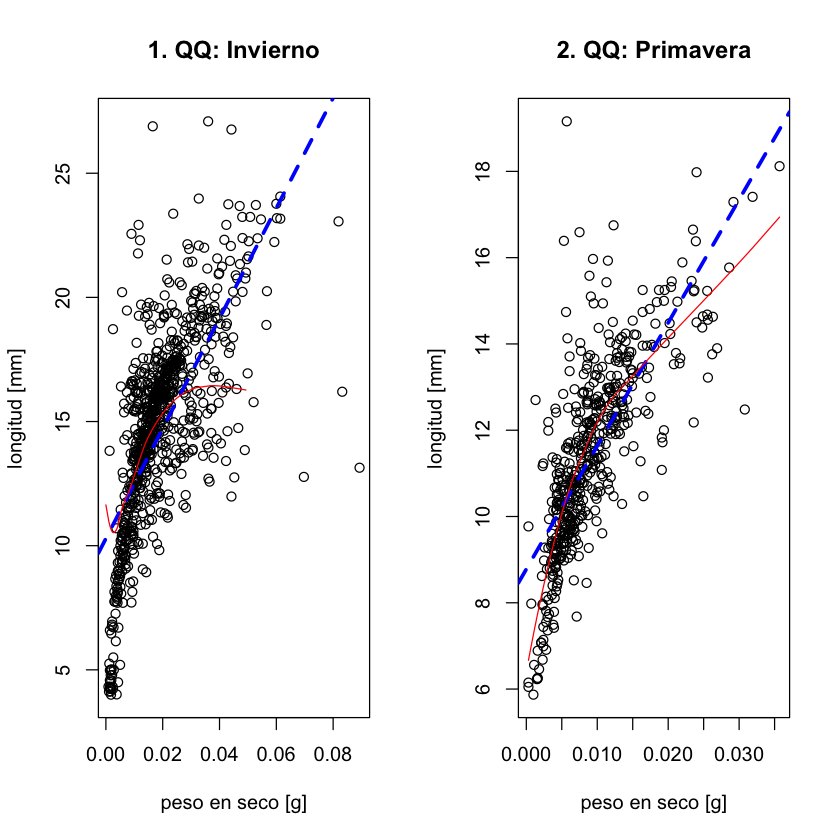

In [91]:
MDQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('MDQ', data$lugar))
QQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('QQ', data$lugar))
CAM_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('CAM', data$lugar))
BARC_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('BARC', data$lugar) )

MDQ_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('MDQ', data$lugar))
QQ_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('QQ', data$lugar))
CAM_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('CAM', data$lugar))
BARC_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('BARC', data$lugar) )
#################### RECLUTAS #######################################################


########################################################################################

layout(matrix(c(1,2,2,2), nrow = 1, ncol = 2, byrow = TRUE))

lw1.Invierno <- loess(longitud ~ peso_seco_vis,data=QQ_invierno)
MLatin.Invierno <- lm(QQ_invierno$longitud ~ QQ_invierno$peso_seco_vis )
plot(longitud ~ peso_seco_vis, MDQ_invierno,main="1. QQ: Invierno",xlab = "peso en seco [g]",ylab = "longitud [mm]")
abline(MLatin.Invierno, col = "blue",type="l", lty=2, lwd=3)
j.invierno <- order(QQ_invierno$peso_seco_vis)
lines(QQ_invierno$peso_seco_vis[j.invierno], lw1.Invierno$fitted[j.invierno], col = "red")

lw1.Primavera <- loess(longitud ~ peso_seco_vis,data=QQ_primavera)
MLatin.Primavera <- lm(QQ_primavera$longitud ~ QQ_primavera$peso_seco_vis )
plot(longitud ~ peso_seco_vis, QQ_primavera,main="2. QQ: Primavera",xlab = "peso en seco [g]",ylab = "longitud [mm]")
abline(MLatin.Primavera, col = "blue",type="l", lty=2, lwd=3)
j.primavera <- order(QQ_primavera$peso_seco_vis)
lines(QQ_primavera$peso_seco_vis[j.primavera], lw1.Primavera$fitted[j.primavera], col = "red")

